<a href="https://colab.research.google.com/github/mohammedfaizan3103/ML-pracitice/blob/main/Week_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **WEEK-8 Ensemble Learning**

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#loading dataset and performing preprocessing
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/diabetes_DT.csv")
df.columns
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

print(df.shape)

X = pd.get_dummies(X, drop_first = True)
X = X.fillna(X.mean())

df.head()
print(df.shape)

(768, 9)
(768, 9)


1. Write a program that demonstrates the advantage of ensemble learning compared to a
single classifier.
Apply a Decision Tree and a Random Forest (RF) classifier on a given dataset.
Compare their performance using evaluation metrics such as accuracy, precision, recall,
and F1-score.
Explore the effect of changing the number of estimators (decision trees) in Random
Forest. Write clear observations with justification.
Intermediate Questions:
 - What differences do you observe between the Decision Tree and Random Forest
results?
 - How does increasing the number of estimators affect performance and stability?
 - Why does Random Forest generally perform better than a single Decision Tree?

In [4]:
#comparing ensemble learning and single dt classifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/diabetes_DT.csv")
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
X = pd.get_dummies(X, drop_first = True)
X = X.fillna(X.mean())
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# using decisiontree classifier
dt_model = DecisionTreeClassifier(random_state=12)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

dt_accuracy = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, average='weighted')
dt_recall = recall_score(y_test, y_pred_dt, average='weighted')
dt_f1 = f1_score(y_test, y_pred_dt, average='weighted')

#using RandomForest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) #change in variation of estimators and randomstate
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Decision Tree metrics: ")
print(f"Accuracy: {dt_accuracy}")
print(f"Precision: {dt_precision}")
print(f"Recall: {dt_recall:}")
print(f"F1-score: {dt_f1}")

print("\nRandom Forest metrics")
print(f"Accuracy: {rf_accuracy}")
print(f"Precision: {rf_precision}")
print(f"Recall: {rf_recall}")
print(f"F1-score: {rf_f1}")

Decision Tree metrics: 
Accuracy: 0.7467532467532467
Precision: 0.7557102785013023
Recall: 0.7467532467532467
F1-score: 0.7496883570181999

Random Forest metrics
Accuracy: 0.7207792207792207
Precision: 0.721938775510204
Recall: 0.7207792207792207
F1-score: 0.7213282898562086


In [5]:
#observation: when number of estimators is high in randomforest, the metrics decrease in value
#as n_estimators increase, the metrics are decreasing

In [6]:
#practice using Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
X, y = iris.data, iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

# Print results
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest (Ensemble) Accuracy: {rf_accuracy:.2f}")


Decision Tree Accuracy: 1.00
Random Forest (Ensemble) Accuracy: 1.00


2. Write a program that demonstrates the use of simple ensemble techniques: Max Voting,
Average Voting, and Weighted Average Voting (assign weights based on each models
performance).
Apply these techniques on a suitable dataset and compare results.
Intermediate Questions:
 - How do the results vary between max voting, average voting, and weighted voting?
 - What is the role of weights in improving ensemble predictions?
 - Which base classifiers combine most effectively under each voting scheme?

In [7]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Diabetes dataset
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/diabetes_DT.csv")

# Handle missing values if any
df = df.dropna()

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier

# Base models
lr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

# Max (Hard) Voting
voting_hard = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt)], voting='hard')
voting_hard.fit(X_train, y_train)
print("Hard Voting Accuracy:", voting_hard.score(X_test, y_test))

# Average (Soft) Voting
voting_soft = VotingClassifier(estimators=[('lr', lr), ('knn', knn), ('dt', dt)], voting='soft')
voting_soft.fit(X_train, y_train)
print("Soft Voting Accuracy:", voting_soft.score(X_test, y_test))


Hard Voting Accuracy: 0.7597402597402597
Soft Voting Accuracy: 0.7727272727272727


3. Write a program to show the difference between Hard Voting and Soft Voting classifiers
in ensemble learning using multiple base learners (e.g., Decision Tree, Logistic
Regression, and KNN).
Intermediate Questions:
 - What is the main difference in prediction mechanisms between hard and soft
voting?
 - In which situations does soft voting outperform hard voting?
 - How does the probability calibration of base classifiers influence soft voting?

In [9]:
#hard voting soft voting for HETEROGENEOUS
import pandas as pd
import numpy as np
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/diabetes_DT.csv")
X = df.drop('Outcome', axis = 1)
y = df['Outcome']
# X = pd.get_dummies(X, drop_first = True)
# X.fillna(X.mean(), inplace = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

estimator = []
estimator.append(('LR',LogisticRegression(solver ='lbfgs', multi_class ='multinomial',max_iter = 100)))
estimator.append(('DTC', DecisionTreeClassifier()))
estimator.append(('KNN', KNeighborsClassifier()))

#hardvoting
hard = VotingClassifier(estimators = estimator, voting ='hard')
hard.fit(X_train, y_train)
y_pred = hard.predict(X_test)
print("Hard Voting Accuracy: ", accuracy_score(y_test, y_pred))

#softvoting
soft = VotingClassifier(estimators = estimator, voting = 'soft')
soft.fit(X_train, y_train)
y_pred_soft = soft.predict(X_test)
print("Soft Voting Accuracy: ", accuracy_score(y_test, y_pred_soft))

Hard Voting Accuracy:  0.7316017316017316
Soft Voting Accuracy:  0.7142857142857143


In [10]:
#HOMOGENOUS Ensemble
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier

estimators = [
    ('DTC1', DecisionTreeClassifier(max_depth=3, random_state=1)),
    ('DTC2', DecisionTreeClassifier(max_depth=5, random_state=2)),
    ('DTC3', DecisionTreeClassifier(max_depth=7, random_state=3))
]

#Hard Voting
homo_hard = VotingClassifier(estimators=estimators, voting='hard')
homo_hard.fit(X_train, y_train)
y_pred_hard = homo_hard.predict(X_test)
print("Hard Voting Accuracy:", accuracy_score(y_test, y_pred_hard))

#Soft Voting
homo_soft = VotingClassifier(estimators=estimators, voting='soft')
homo_soft.fit(X_train, y_train)
y_pred_soft = homo_soft.predict(X_test)
print("Soft Voting Accuracy:", accuracy_score(y_test, y_pred_soft))


Hard Voting Accuracy: 0.7229437229437229
Soft Voting Accuracy: 0.70995670995671


4. Write a program to explore the Bagging technique using the RandomForestClassifier on a
suitable dataset.
Experiment with parameters such as number of estimators, maximum depth, and random
state.
Write detailed observations and justify the changes in model performance.
Intermediate Questions:
 - How do different values of n_estimators and max_depth affect model performance?
 - What does Bagging achieve in terms of variance and bias reduction?
 - How does Random Forest handle overfitting compared to a single Decision Tree?

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/diabetes_DT.csv")
X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
params = [
    {'n_estimators': 10, 'max_depth': 3},
    {'n_estimators': 50, 'max_depth': 3},
    {'n_estimators': 100, 'max_depth': None},
    {'n_estimators': 200, 'max_depth': 5}
]

for p in params:
    rf = RandomForestClassifier(
        n_estimators=p['n_estimators'],
        max_depth=p['max_depth'],
        random_state=42
    )
    rf.fit(X_train_scaled, y_train)
    y_pred = rf.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"n_estimators={p['n_estimators']}, max_depth={p['max_depth']}, Accuracy={acc}")


n_estimators=10, max_depth=3, Accuracy=0.7662337662337663
n_estimators=50, max_depth=3, Accuracy=0.7575757575757576
n_estimators=100, max_depth=None, Accuracy=0.7575757575757576
n_estimators=200, max_depth=5, Accuracy=0.7575757575757576


5. Write a program using the RandomForestRegressor model to make predictions on a
suitable regression dataset.
Enable and observe the oob_score (Out-of-Bag score) parameter.
Interpret the results and explain its significance.
Intermediate Questions:
 - What does the oob_score_ indicate about model performance?
 - How does Out-of-Bag evaluation differ from traditional test-set evaluation?
 - How does the OOB score change with different numbers of trees?

In [12]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Diabetes dataset
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/diabetes_DT.csv")

# Handle missing values if any
df = df.dropna()

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rfreg = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rfreg.fit(X_train, y_train)
y_pred = rfreg.predict(X_test)

print("OOB Score:", rfreg.oob_score_)
print("R2 Score:", r2_score(y_test, y_pred))


OOB Score: 0.2930007894573772
R2 Score: 0.2551886868686867


6. Exploring Boosting Techniques
Task:
Write a program to explore different Boosting techniques using suitable datasets:
Adaptive Boosting (AdaBoost) – binary classification,
Gradient Boosting – classification and regression,
XGBoost,
CatBoost.
Write your observations for each model, highlighting how it improves over the previous
iterations and corrects earlier errors.
Intermediate Questions:
 - How does AdaBoost focus on misclassified samples?
 - What makes Gradient Boosting more flexible than AdaBoost?
 - How do XGBoost and CatBoost optimize training speed and accuracy?
 - Which boosting algorithm provided the best trade-off between performance and
computation time?

In [14]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Diabetes dataset
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/diabetes_DT.csv")

# Handle missing values if any
df = df.dropna()

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier

# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
print("AdaBoost Accuracy:", ada.score(X_test, y_test))

# observation:
# it focuses on misclassified samples
# accuracy improves over iterations but it is sensitive to noise/outliers

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", gb.score(X_test, y_test))

# XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train, y_train)
print("XGBoost Accuracy:", xgb.score(X_test, y_test))

# observation:
# it is faster and often more accurate than Gradient Boosting

AdaBoost Accuracy: 0.7402597402597403
Gradient Boosting Accuracy: 0.7402597402597403
XGBoost Accuracy: 0.7597402597402597


7. Comparative Study of Ensemble Models
Task:
Apply all ensemble models (Bagging, Random Forest, AdaBoost, Gradient Boosting,
XGBoost, and CatBoost) on the same dataset.
Prepare a detailed report comparing their results based on accuracy, training time, model
interpretability, and overfitting/underfitting behavior.
Intermediate Questions:
 - Which model achieved the best performance?
 - Why did that model perform better than others?
 - What trade-offs (speed, interpretability, complexity) did you observe across models?
 - Which ensemble method would you recommend for large-scale real-world data and
why?

In [16]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load Diabetes dataset
df = pd.read_csv("/content/drive/MyDrive/ML-lab/Datasets/diabetes_DT.csv")

# Handle missing values if any
df = df.dropna()

# Split features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
models = {
    "Bagging (RF)": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(
    n_estimators=100,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(f"{name} Accuracy: {model.score(X_test, y_test)}")


Bagging (RF) Accuracy: 0.7272727272727273
AdaBoost Accuracy: 0.7402597402597403
Gradient Boosting Accuracy: 0.7402597402597403
XGBoost Accuracy: 0.7597402597402597


7. Visualisation part

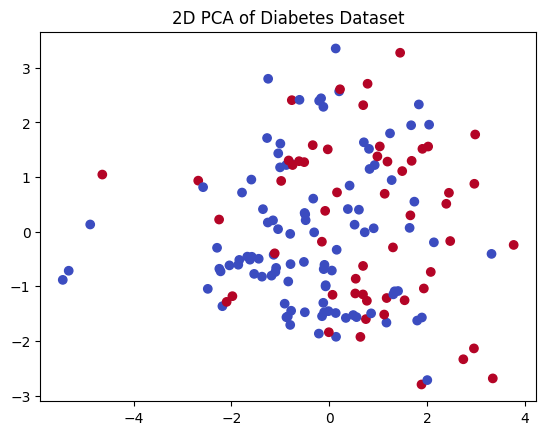

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_test)
plt.scatter(X_vis[:, 0], X_vis[:, 1], c=y_test, cmap='coolwarm')
plt.title("2D PCA of Diabetes Dataset")
plt.show()
